### STUDENT DETAILS

#### NAMES

- Laaria Chris  - laaria.chris@student.moringaschool.com

- Henry Rono    - henry.rono@student.moringaschool.com

- Beryl Agai    - beryl.agai@student.moringaschool.com


#### MODULE 

Full time

#### INSTRUCTORS

- Asha Deen

- Lucille Kaleha

#### JIRA BOARD

https://moringaprojectss.atlassian.net/jira/core/projects/PM/board?atlOrigin=eyJpIjoiNTM0MjRkYTYzNjJjNGUyNjg5MDA3NTAxZDJhY2NmOTciLCJwIjoiaiJ9



## PAEDIATRIC PNEUMONIA DETECTION THROUGH XRAY IMAGE CLASSIFICATION :A DEEP LEARNING APPROACH



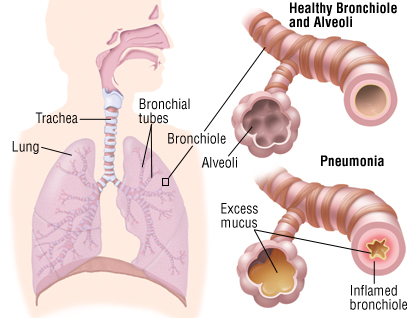

### 1. BUSINESS UNDERSTANDING

#### 1.1.1 Overview

From Mayo Clinic's Article on pneumonia

Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia.

Pneumonia can range in seriousness from mild to life-threatening. It is most serious for infants and young children, people older than age 65, and people with health problems or weakened immune systems.


#### 1.1.2 Stakeholders Definition

The possible stakeholders in this project are:

- Doctors and Radiologists: Receive support in diagnosing pneumonia more accurately and quickly.


- Patients: Benefit from faster diagnoses and timely treatment, leading to better health outcomes.


- Hospital and Clinic Administrators: Improve diagnostic efficiency and patient care while reducing operational costs.


- Healthcare Regulatory Authorities: Ensure the diagnostic tool adheres to medical standards, enhancing patient safety.


#### 1.1.3 Challenges Faced in paediatric peneumonia detection

Some of the challenges experienced in detecting paediatric pneumonia are:

- Variability in Symptoms: Pediatric pneumonia symptoms can vary widely, making it difficult to diagnose based solely on clinical presentation.


- Radiographic Differences: Children's chest x-rays can be harder to interpret due to differences in anatomy and the presence of other conditions.


- Limited Data: There is often a lack of large, labeled pediatric datasets for training and validating AI models.


- Co-morbidities: Children may have other respiratory illnesses that complicate the diagnosis of pneumonia.


- Ethical and Privacy Concerns: Ensuring the ethical use of children's medical data and maintaining strict privacy standards can be challenging.

#### 1.1.4 Proposed Solution and Sucess Criteria

- Customized CNN Architectures: Develop and train convolutional neural networks tailored for pediatric chest x-ray images, aiming for a ROC-AUC score of at least 0.90.


- Multi-task Learning: Implement models capable of diagnosing pneumonia and other respiratory conditions simultaneously, achieving a balanced accuracy of over 85% for all target conditions.


- Data Augmentation and Synthesis: Use data augmentation and synthetic data generation to create a diverse training dataset, improving the F1-score by 10% on the test set.

#### 1.1.5 Brief Conclusion

This project leverages advanced deep learning techniques to enhance the accuracy and efficiency of pediatric pneumonia detection from chest x-ray images. By addressing key challenges with customized CNN architectures, multi-task learning, and data augmentation, we aim to provide a reliable and scalable diagnostic tool for improved healthcare outcomes.








### 1.2 PROBLEM STATEMENT

In 2017, pneumonia was responsible for 15% of deaths in children under five years old, making it the most common cause of death in children.
We will develop a deep learning-based model to accurately classify whether a pediatric patient has pneumonia from chest x-ray images, addressing challenges such as variability in symptoms, radiographic differences, limited data, co-morbidities, and ethical concerns to improve diagnostic accuracy and efficiency in a clinical setting.


### 1.3 OBJECTIVES

#### 1.3.1 Main Objective

Our main objective is develop a deep learning-based model to accurately classify whether a pediatric patient has pneumonia from chest x-ray images,with at least 90% accuracy to improve diagnostic accuracy and efficiency in a clinical setting.


#### 1.3.2 Business Questions

The business questions that we need to ask so as to meet our main objective include:

- What is the anticipated impact on diagnostic efficiency and accuracy?
Evaluate how the model will improve the speed and precision of pneumonia diagnoses.


- What are the cost implications of implementing the model?
Assess the financial investment required versus potential cost savings from reduced misdiagnoses.


- How will the model integrate with existing healthcare systems?
Determine the technical and operational requirements for seamless integration into current IT infrastructure.


- What are the expected benefits for patients and healthcare providers?
Identify the improvements in patient outcomes and support provided to healthcare professionals.


#### 1.3.3 Success Metrics

- Diagnostic Accuracy: Achieve an accuracy of at least 90% in classifying pneumonia from chest x-ray images.


- ROC-AUC Score: Obtain a Receiver Operating Characteristic Area Under the Curve (ROC-AUC) score of 0.90 or higher, indicating strong performance in distinguishing between pneumonia and non-pneumonia cases.


- Reduction in Diagnostic Time: Decrease the average time for pneumonia diagnosis by at least 30% compared to current methods.


- Cost Savings: Realize a measurable reduction in costs associated with misdiagnoses and unnecessary treatments, aiming for a return on investment (ROI) of at least 20%.


- User Satisfaction: Achieve positive feedback from healthcare providers and patients, with a satisfaction rating of 85% or higher regarding the model’s usability and impact on care.








## B. DATA UNDERSTANDING

In [1]:
# Import libraries
import pandas as pd  # data processing
import numpy as np  # linear algebra
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from pathlib import Path
import os
import warnings
import random

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import VGG16, InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras import backend as K

# Image processing and visualizations
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cv2

# Ignore future warnings
warnings.filterwarnings('ignore', category=FutureWarning)

### Setting Directories

In [2]:
base_dir = Path("chest-xray-pneumonia/chest_xray/")
test_dir = base_dir / "test/"
train_dir = base_dir / "train/"
val_dir = base_dir / "val/"


### Data Loading

#### Files in test dataset

In [3]:
# Files in test dataset
os.listdir(test_dir)
test_normal_dir = test_dir / "NORMAL"
test_pneumonia_dir = test_dir / "PNEUMONIA"

In [4]:
test_normal_dir = test_dir /"NORMAL" #to set the path to the normals in test set
test_pneumonia_dir = test_dir /"PNEUMONIA" #to set the path to the pneumonias in test set

#### Files train Dataset

In [5]:
os.listdir(train_dir)

['NORMAL', 'PNEUMONIA']

In [6]:
train_normal_dir = train_dir /"NORMAL" #to set the path to the normals in train set
train_pneumonia_dir = train_dir /"PNEUMONIA" #to set the path to the pneumonias in train set

#### Files in validatation Dataset

In [7]:
os.listdir(val_dir)

['NORMAL', 'PNEUMONIA']

In [8]:
valid_normal_dir = val_dir /"NORMAL" #to set the path to the normals in validation set
valid_pneumonia_dir = val_dir /"PNEUMONIA" #to set the path to the pneumonias in validation set

### Labeling

#### Setting the dataset for training

In [9]:
train_normal= train_normal_dir.glob("*.jpeg") #to take the normal images from train set 
train_pneumonia=train_pneumonia_dir.glob("*.jpeg") #to take the pneumonia images from the train set
train_set=[]#to add all the train data into one list, we created a blank list

In [10]:
for img in train_normal: #to add every image of normals in trainset to the list
  train_set.append((img, 0)) #we add 0 with normal images as label
for img in train_pneumonia:#to add every image of pneumonias in trainset to the list
  train_set.append((img, 1)) #we add 1 with pneumonia images as label

In [11]:
print(train_set[:15]) #to check what our list look like

[(WindowsPath('chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0115-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0117-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0119-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0122-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0125-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0127-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0128-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0129-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0131-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0133-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0135-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0137-0001.jpe

In [12]:
train_set=pd.DataFrame(train_set, columns=["image", "label"], index=None)#to create a dataframe from the list, so that we can use dataframe features


In [13]:
train_set.head() #to see the first 5 rows of our dataframe, only normals are shown since we added them first.

,image,label
0,chest-xray-pneumonia\chest_xray\train\NORMAL\I...,0
1,chest-xray-pneumonia\chest_xray\train\NORMAL\I...,0
2,chest-xray-pneumonia\chest_xray\train\NORMAL\I...,0
3,chest-xray-pneumonia\chest_xray\train\NORMAL\I...,0
4,chest-xray-pneumonia\chest_xray\train\NORMAL\I...,0


In [14]:
train_set=train_set.sample(frac=1) #to shuffle all the rows in dataframe so that we can see normal and pneumonia in random
train_set=train_set.reset_index(drop=True) #to set the indexes as if first time
train_set.head()

,image,label
0,chest-xray-pneumonia\chest_xray\train\PNEUMONI...,1
1,chest-xray-pneumonia\chest_xray\train\NORMAL\N...,0
2,chest-xray-pneumonia\chest_xray\train\PNEUMONI...,1
3,chest-xray-pneumonia\chest_xray\train\PNEUMONI...,1
4,chest-xray-pneumonia\chest_xray\train\PNEUMONI...,1


In [15]:
train_set=train_set.sample(frac=1) #to shuffle all the rows in dataframe so that we can see normal and pneumonia in random
train_set=train_set.reset_index(drop=True) #to set the indexes as if first time
train_set.head()

,image,label
0,chest-xray-pneumonia\chest_xray\train\PNEUMONI...,1
1,chest-xray-pneumonia\chest_xray\train\PNEUMONI...,1
2,chest-xray-pneumonia\chest_xray\train\NORMAL\N...,0
3,chest-xray-pneumonia\chest_xray\train\PNEUMONI...,1
4,chest-xray-pneumonia\chest_xray\train\PNEUMONI...,1


#### Setting the dataset for valdiation

In [16]:
valid_normal= valid_normal_dir.glob("*.jpeg") #to take the normal images from validation set 
valid_pneumonia=valid_pneumonia_dir.glob("*.jpeg") #to take the pneumonia images from the validation set
valid_set=[] #to add all the validation data into one list, we created a blank list

In [17]:
for img in valid_normal: #to add every image of normals in validationset to the list
  valid_set.append((img, 0)) #we add 0 with normal images as label
for img in valid_pneumonia:#to add every image of pneumonias in validationset to the list
  valid_set.append((img, 1)) #we add 1 with pneumonia images as label


In [18]:
print(valid_set[:15]) #to check what our list look like

[(WindowsPath('chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg'), 1), (WindowsPath('chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg'), 1), (WindowsPath('chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.

In [19]:
valid_set=pd.DataFrame(valid_set, columns=["image", "label"], index=None)#to create a dataframe from the list, so that we can use dataframe features
valid_set.head() #to see the first 5 rows of our dataframe, only normals are shown since we added them first.

,image,label
0,chest-xray-pneumonia\chest_xray\val\NORMAL\NOR...,0
1,chest-xray-pneumonia\chest_xray\val\NORMAL\NOR...,0
2,chest-xray-pneumonia\chest_xray\val\NORMAL\NOR...,0
3,chest-xray-pneumonia\chest_xray\val\NORMAL\NOR...,0
4,chest-xray-pneumonia\chest_xray\val\NORMAL\NOR...,0


In [20]:
valid_set=valid_set.sample(frac=1) #to shuffle all the rows in dataframe so that we can see normal and pneumonia in random
valid_set=valid_set.reset_index(drop=True) #to set the indexes as if first time
valid_set.head()

,image,label
0,chest-xray-pneumonia\chest_xray\val\PNEUMONIA\...,1
1,chest-xray-pneumonia\chest_xray\val\NORMAL\NOR...,0
2,chest-xray-pneumonia\chest_xray\val\PNEUMONIA\...,1
3,chest-xray-pneumonia\chest_xray\val\PNEUMONIA\...,1
4,chest-xray-pneumonia\chest_xray\val\PNEUMONIA\...,1


#### Setting the dataset for test

In [21]:
test_normal= test_normal_dir.glob("*.jpeg") #to take the normal images from test set 
test_pneumonia=test_pneumonia_dir.glob("*.jpeg") #to take the pneumonia images from the test set
test_set=[]#to add all the test data into one list, we created a blank list

In [22]:
for img in test_normal: #to add every image of normals in test set to the list
  test_set.append((img, 0)) #we add 0 with normal images as label
for img in test_pneumonia:#to add every image of pneumonias in test set to the list
  test_set.append((img, 1)) #we add 1 with pneumonia images as label


In [23]:
print(test_set[:15]) #to check what our list look like

[(WindowsPath('chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0001-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0003-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0005-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0006-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0007-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0009-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0010-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0011-0001-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0011-0001-0002.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0011-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0013-0001.jpeg'), 0), (WindowsPath('chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0015-0001.jpeg'

In [24]:
test_set=pd.DataFrame(test_set, columns=["image", "label"], index=None)#to create a dataframe from the list, so that we can use dataframe features
test_set.head() #to see the first 5 rows of our dataframe, only normals are shown since we added them first.

,image,label
0,chest-xray-pneumonia\chest_xray\test\NORMAL\IM...,0
1,chest-xray-pneumonia\chest_xray\test\NORMAL\IM...,0
2,chest-xray-pneumonia\chest_xray\test\NORMAL\IM...,0
3,chest-xray-pneumonia\chest_xray\test\NORMAL\IM...,0
4,chest-xray-pneumonia\chest_xray\test\NORMAL\IM...,0


In [25]:
test_set=test_set.sample(frac=1) #to shuffle all the rows in dataframe so that we can see normal and pneumonia in random
test_set=test_set.reset_index(drop=True) #to set the indexes as if first time
test_set.head()

,image,label
0,chest-xray-pneumonia\chest_xray\test\NORMAL\IM...,0
1,chest-xray-pneumonia\chest_xray\test\PNEUMONIA...,1
2,chest-xray-pneumonia\chest_xray\test\PNEUMONIA...,1
3,chest-xray-pneumonia\chest_xray\test\NORMAL\NO...,0
4,chest-xray-pneumonia\chest_xray\test\NORMAL\IM...,0


### Data Visualization

In [26]:
# Normal Image
train_normal_count= train_set.loc[train_set["label"]==0]["image"].count()
print("Total number of normal images:", train_normal_count)

Total number of normal images: 1341


In [27]:
# Pneumonia Image
train_pneumonia_count= train_set.loc[train_set["label"]==1]["image"].count()
print("Total number of pneumonia images:", train_pneumonia_count)

Total number of pneumonia images: 3875


#### Normal / Pneumonia Image Visualization for Train Dataset

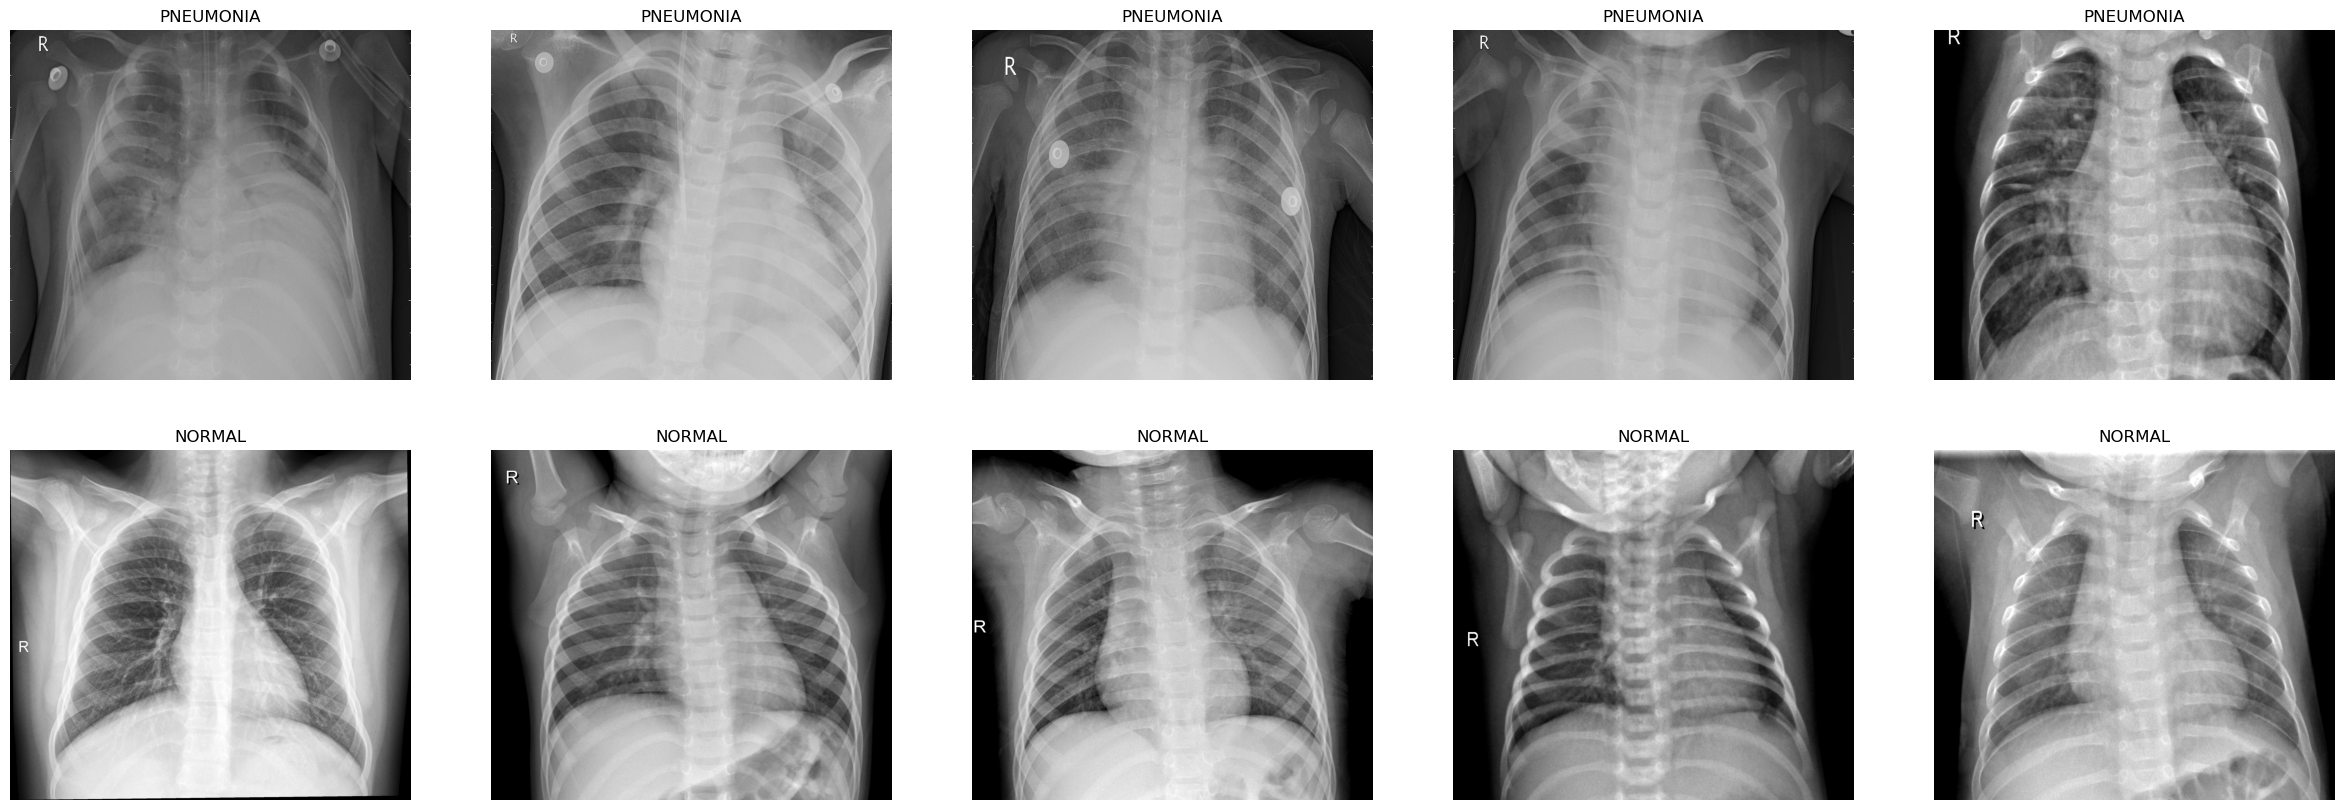

In [28]:
# Get few samples for both the classes
pneumonia_samples = (train_set[train_set["label"] == 1]["image"].iloc[:5]).tolist()
normal_samples = (train_set[train_set["label"] == 0]["image"].iloc[:5]).tolist()

# Concate the data in a single list and del the above two list
samples = pneumonia_samples + normal_samples
del pneumonia_samples, normal_samples

# Plot the data
f, ax = plt.subplots(2,5, figsize = (30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i % 5].imshow(img, cmap='gray')
    if i < 5:
        ax[i//5, i % 5].set_title("PNEUMONIA")
    else:
        ax[i//5, i % 5].set_title("NORMAL")
    ax[i//5, i % 5].axis('off')
    ax[i//5, i % 5].set_aspect('auto')
plt.show()

#### Distribution Plots

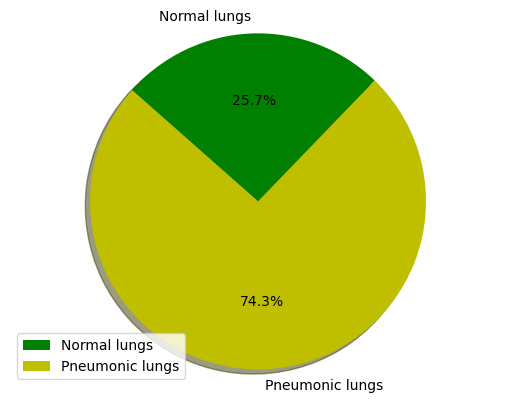

In [29]:
fig1,ax1= plt.subplots()
sizes=[train_normal_count, train_pneumonia_count]
ax1.pie(sizes, startangle=46 ,labels=["Normal lungs","Pneumonic lungs"], autopct="%1.1f%%", shadow=True, colors=["g","y"])
ax1.axis("equal")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Case Distribution')

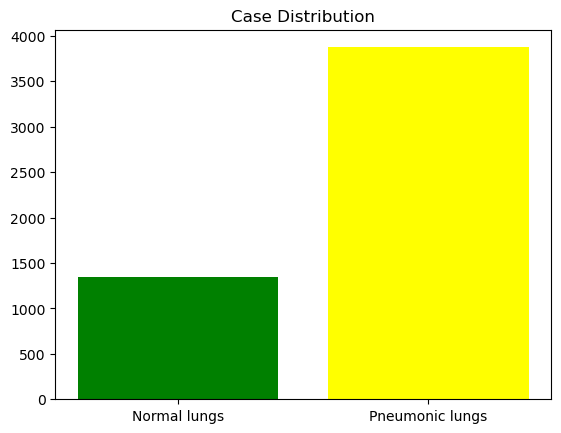

In [30]:
fig2, ax2=plt.subplots()
ax2.bar(height=sizes, x=["Normal lungs", "Pneumonic lungs"], color=["green", "yellow"])
plt.title("Case Distribution")

Based on this analysis, our dataset shows an imbalance between the number of "Normal" and "Pneumonia" images. To address this, we will employ Data Augmentation techniques specifically aimed at increasing the number of "Normal" images.



